<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
pip install graphviz

In [4]:
from IPython.display import SVG, display, HTML

In [5]:
style = "<style>svg{width: 70% !important; height: 60% !important;} </style>" 
HTML(style)

In [7]:
titanic_data = pd.read_csv("train.csv")

In [8]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
Y = titanic_data.Survived

In [11]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [12]:
X = pd.get_dummies(X)

In [13]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [14]:
X = X.fillna(X.Age.median())

In [15]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.fit(X, Y)

DecisionTreeClassifier(criterion='entropy')

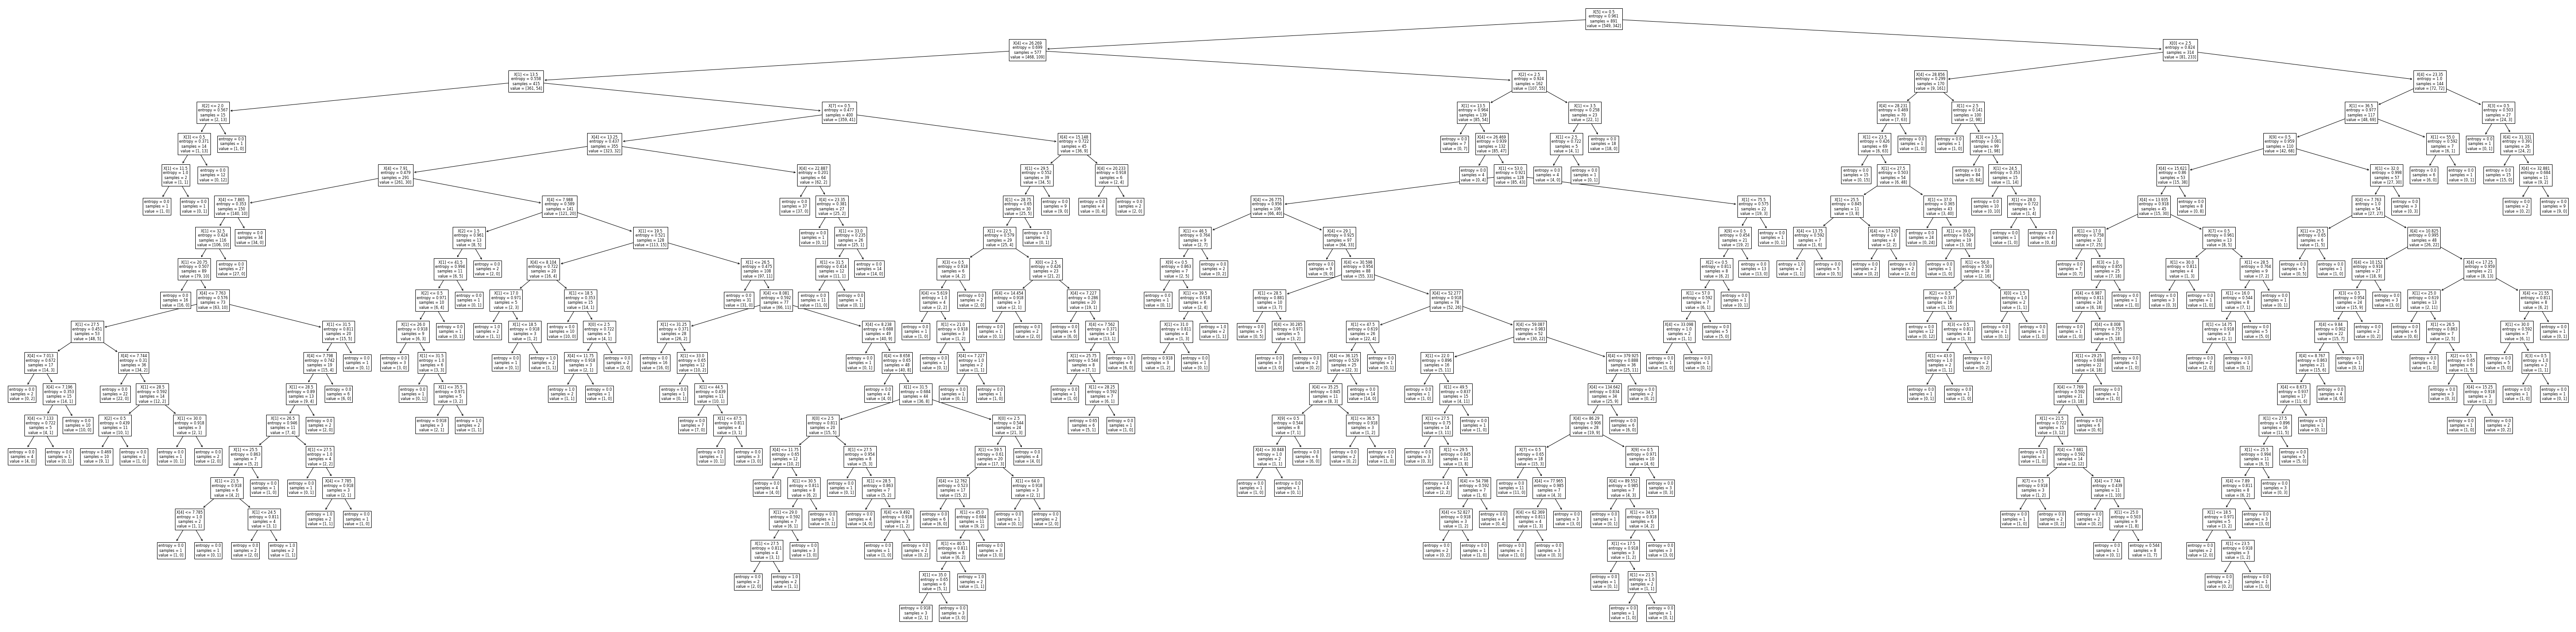

In [23]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf);

In [24]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [27]:
X_train.shape

(596, 10)

In [28]:
X_test.shape

(295, 10)

In [29]:
clf.score(X, Y)

0.9797979797979798

In [30]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy')

In [31]:
clf.score(X_train, Y_train)

0.9798657718120806

In [32]:
clf.score(X_test, Y_test)

0.7694915254237288

In [45]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [46]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [47]:
clf.score(X_train, Y_train)

0.8238255033557047

In [48]:
clf.score(X_test, Y_test)

0.8203389830508474